In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0022-08.SSH.nc')
        plotvar = data.variables['SSH'][0,:,500:2000]
        plotvar[plotvar == -1.0] = np.nan
        lont = data.variables['TLONG'][:,500:2000]
        latt = data.variables['TLAT'][:,500:2000]
        lont = lont[:,:]

In [3]:

nice_cmap=plt.get_cmap('jet')
lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,140,150,160,170,180,190,200,210,220,230,240,290,300])
new_cmap = cols.ListedColormap(lev_cmap,"jet")

nice_levels = [-208,-206,-204,-202,-200,-198,-196,-194,-192,-190,-188,-186,-184,-182,-180,-178,-176,-174,-172,-170]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


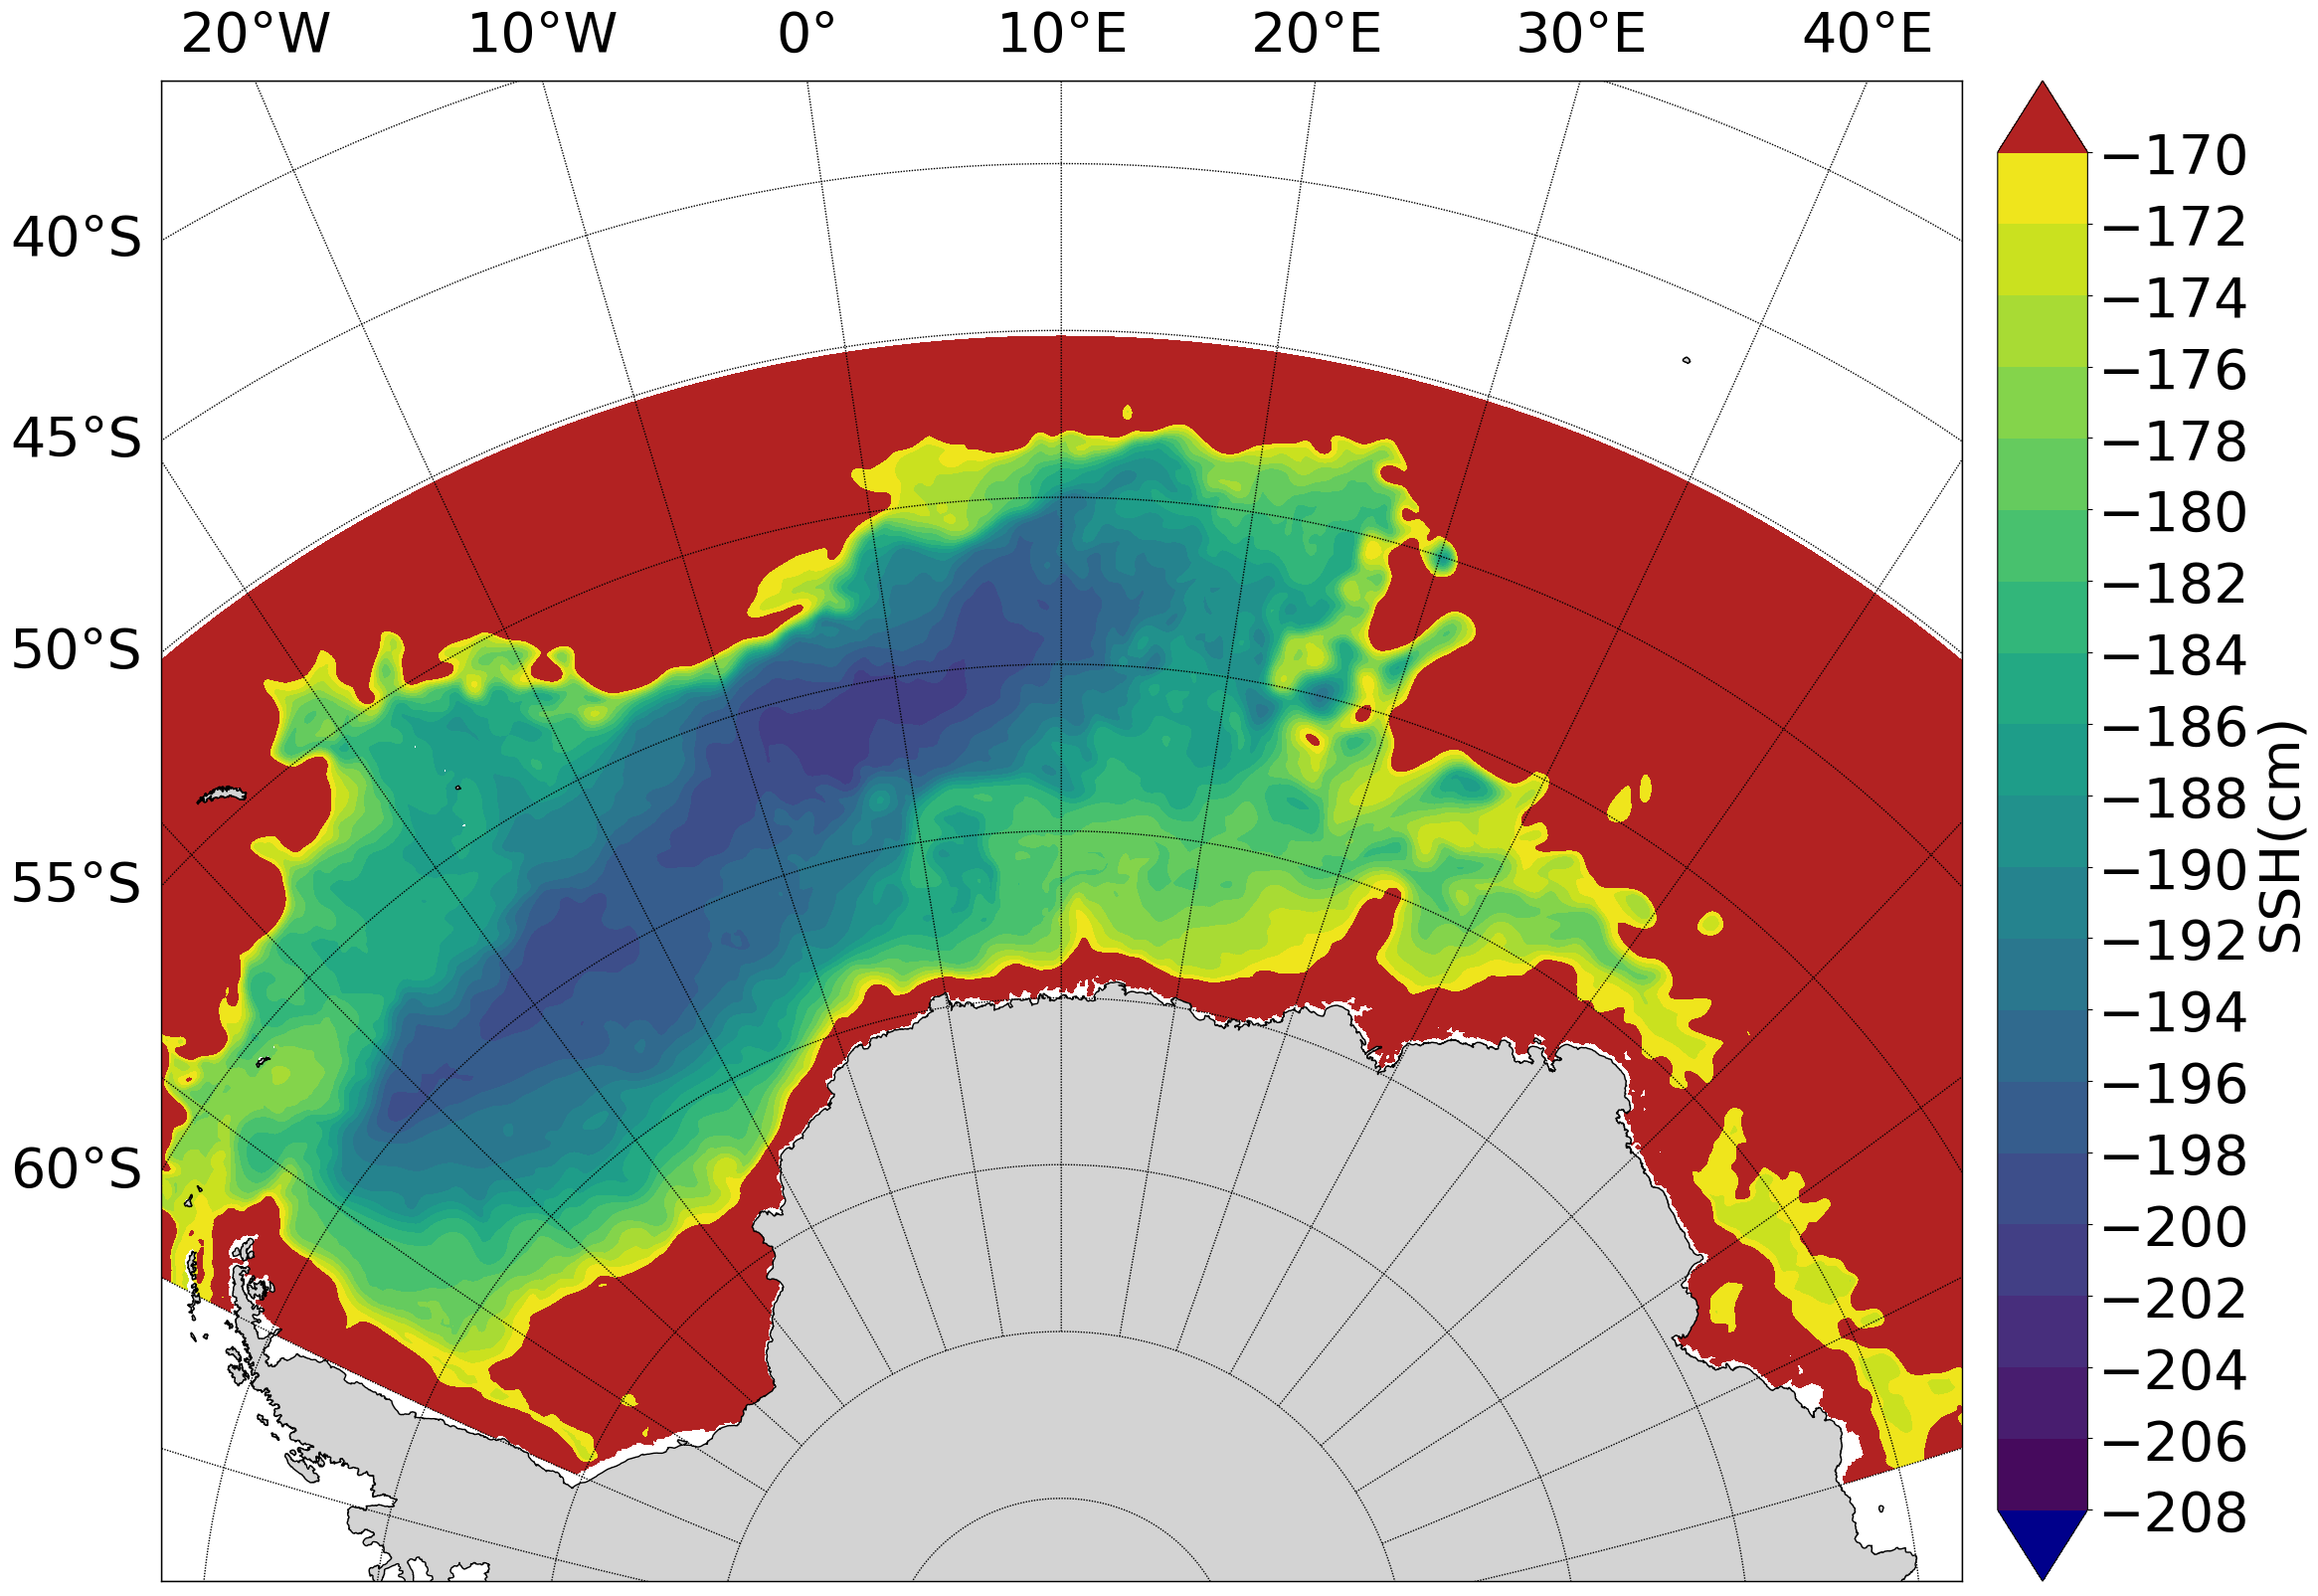

In [4]:
        plt.figure(figsize=(25,20),dpi=100)
        my_font = {'fontname':'Cambria', 'size':'40'}

        map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 10,area_thresh = 100,\
                     width =6000000,height =5000000,resolution ='h') 
        map.drawcoastlines()
        map.fillcontinents(color = 'lightgrey')
        map.drawmapboundary(color='black')
 
        map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
        map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

        x,y=map(lont,latt)

        CP = map.contourf(x,y,plotvar,levels = nice_levels,extend='both')
       
        CP.cmap.set_over('firebrick')
        CP.cmap.set_under('darkblue')
        cbar =map.colorbar(CP,extend='both',extendfrac='auto',ticks= nice_levels)
        #CP = map.quiver(xq,yq,plotvaru,plotvarv)
        cbar.ax.tick_params(labelsize=40) 
        cbar.set_label('SSH(cm)', **my_font)
        plt.savefig("/scratch/user/xiliangdiao/plot/mix(167-08)",bbox_inches='tight')